In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import nltk as tk
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud

### **Import Data**

In [ ]:
# load data
from google.colab import files
uploaded = files.upload()

Saving data.zip to data.zip


In [ ]:
#Unzip data
!unzip -q data.zip

In [ ]:
import os

In [ ]:
import pandas as pd 

# Load Dataset to the Dataframe
df_train = pd.read_csv('./data/sentiment_dataset_train.csv')
df_dev = pd.read_csv('./data/sentiment_dataset_dev.csv')
df_test = pd.read_csv('./data/sentiment_dataset_test.csv')
df_labels = pd.read_csv('./data/sentiment_ratings_labels.txt', header=None)

In [ ]:
(df_train.shape, df_dev.shape, df_test.shape, df_labels.shape)

((35005, 3), (7499, 3), (6500, 2), (5, 1))

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35005 entries, 0 to 35004
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      35005 non-null  int64 
 1   review  35005 non-null  object
 2   rating  35005 non-null  object
dtypes: int64(1), object(2)
memory usage: 820.6+ KB


In [ ]:
df_train.rating.unique()

array(['4', '2', '3', '1', '5',
       'Tables not made up prior to guest seating. 2.'], dtype=object)

In [ ]:
df_train.drop(df_train.index[df_train['rating'] == 'Tables not made up prior to guest seating. 2.'], inplace = True)

In [ ]:
df_train.rating.unique()

array(['4', '2', '3', '1', '5'], dtype=object)

### **Check the data**

In [ ]:
print(df_train)

          id                                             review rating
0          0  Arrived about 10pm and check in was painless. ...      4
1          1  I checked in at 4pm even tough room was not re...      2
2          2  I chose this hotel, as it was in a good locati...      2
3          3  Great location, super close to shops & a 10min...      4
4          4  I was in the Sir Adam Hotel to visit a friend....      3
...      ...                                                ...    ...
35000  35000  Paris is always welcome city, but this time th...      5
35001  35001  Beautiful place very clean and welcoming irini...      3
35002  35002  The hotel is ok considering the price we paid....      3
35003  35003  First your stuck if you miss last tram at midn...      3
35004  35004  The staff was very nice. The room was fine - n...      3

[35004 rows x 3 columns]


In [ ]:
print(df_dev)

        id                                             review  rating
0        0  The hotel position is very good, center of the...       2
1        1  Not a very big room but very comfortable and c...       4
2        2  The hotel is located near Kurfürstendamm in a ...       4
3        3  My booking was for 2 rooms and I have made the...       2
4        4  Excellent hotel, fantastic swimming pool, very...       5
...    ...                                                ...     ...
7494  7494  we stayed here earlier this month with another...       5
7495  7495  We stayed 3 nights at this hotel.   The staff ...       3
7496  7496  Our first night here, a large group of Guests ...       2
7497  7497  Arrived here on Thursday 14th with 5 other peo...       3
7498  7498  I had a wonderful 5 night stay at the Hotel l'...       5

[7499 rows x 3 columns]


In [ ]:
print(df_test)

        id                                             review
0        0  Not at all what expected.   Our mountain view ...
1        1  Good location as we needed to head to Reims th...
2        3  Me and my son just returned from Broadmoor Mia...
3        4  The place was filthy and full of stoned backpa...
4        6  The hotel itself is really nice and modern whi...
...    ...                                                ...
6495  7494  The building is a superb one, pretty nice gard...
6496  7496  I stayed here as part of a 3 day family trip t...
6497  7497  We stayed in this hotel for 2 nights (couple +...
6498  7498  I have previously felt that the Intercontinent...
6499  7499  We booked this hotel on Expedia because of its...

[6500 rows x 2 columns]


In [ ]:
with open("./data/sentiment_ratings_labels.txt", 'r') as myfile:
   df_labels = myfile.read()

In [ ]:
print(df_labels)

1
2
3
4
5



In [ ]:
df_train.rating.value_counts()

2    7031
1    7028
4    6997
5    6977
3    6971
Name: rating, dtype: int64

In [ ]:
df_train.describe()

id
count  35004.000000
mean   17501.615987
std    10105.106348
min        0.000000
25%     8750.750000
50%    17501.500000
75%    26252.250000
max    35004.000000

In [ ]:
df_train.rating.value_counts().plot.pie()

In [ ]:
rating = pd.DataFrame(df_train.groupby('rating').size().sort_values(ascending=False)).reset_index()

In [ ]:
rating.rename(columns={0:'count'},inplace=True)

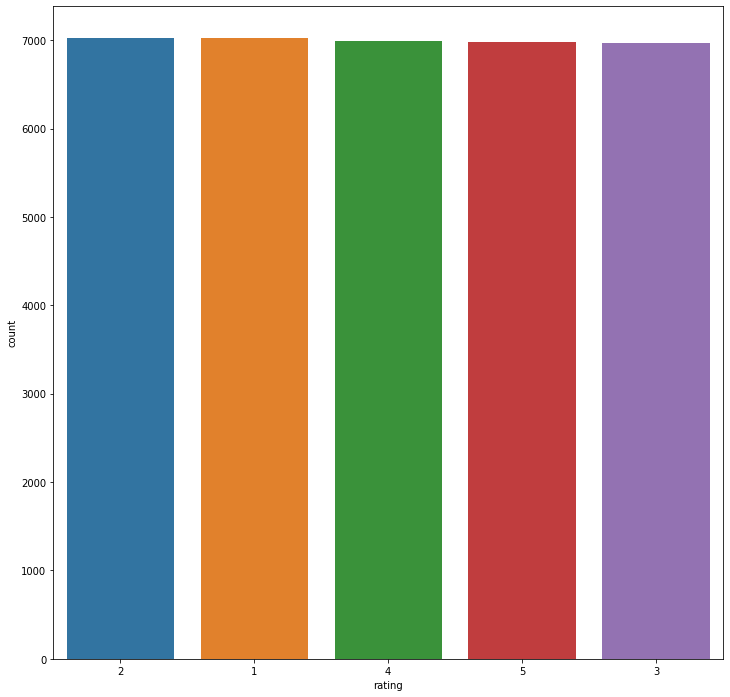

In [ ]:
plt.figure(figsize=(12,12))
sns.barplot(x='rating',y='count',data=rating)
plt.show()

### **Word Processing for the Training Dataset**

In [ ]:
sns.set_context('poster')

In [ ]:
tk.download('punkt')
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
flat_review = " ".join(df_train['review'].values)

In [ ]:
flat_list_reviews = []
tokenizer = RegexpTokenizer(r'[a-zA-Z]+') 
tokenized_reviews = tokenizer.tokenize(flat_review)

for review in tokenized_reviews:
    flat_list_reviews.append(review.lower())

In [ ]:
stop_words = stopwords.words("english")

flat_list_reviews_no_stop = [word for word in flat_list_reviews if word not in stop_words]

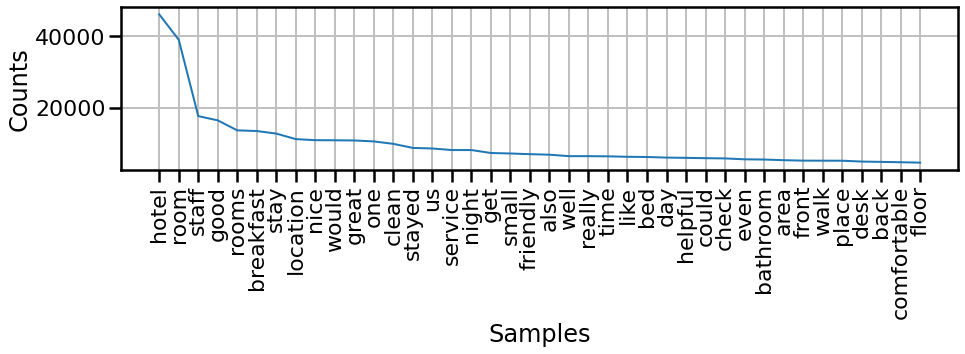

In [ ]:
plt.figure(figsize=(15,3))
FreqDist(flat_list_reviews_no_stop).plot(40)
plt.show()

In [ ]:
for word in ['hotel','room','staff','rooms','location','would','could','one','us','get','also','time','bed','bathroom','check','area','walk','front','place','desk','bathroom','back','floor','even','first','close']:
    stop_words.append(word)

In [ ]:
flat_list_reviews_no_stop_2 =  [word for word in flat_list_reviews if word not in stop_words]

In [ ]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_reviews_no_stop_2).plot(20)
plt.show()

In [ ]:
for word in ['really','night','around','nights','shower','next','day','two']:
    stop_words.append(word)

In [ ]:
flat_list_reviews_no_stop_3 = [word for word in flat_list_reviews_no_stop_2 if word not in stop_words]

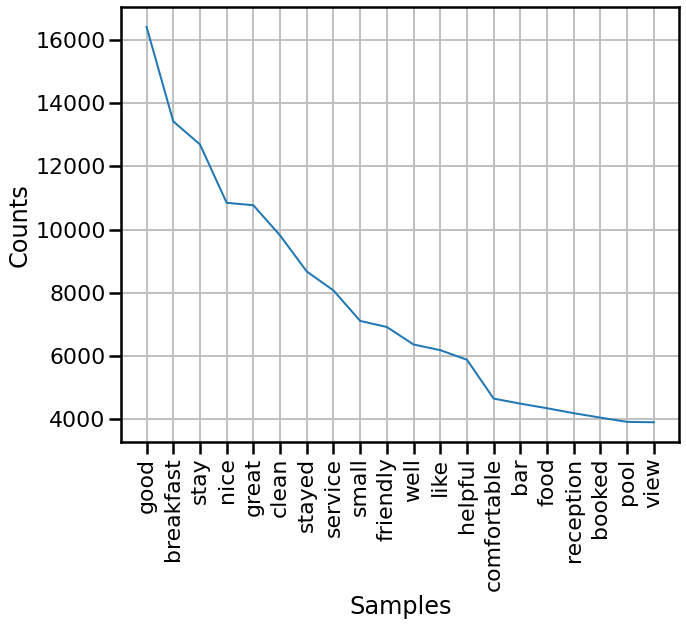

In [ ]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_reviews_no_stop_3).plot(20)
plt.show()

In [ ]:
for word in ['breakfast','bar','food','reception','booked','view','pool']:
    stop_words.append(word)

In [ ]:
flat_list_reviews_no_stop_4 = [word for word in flat_list_reviews_no_stop_3 if word not in stop_words]

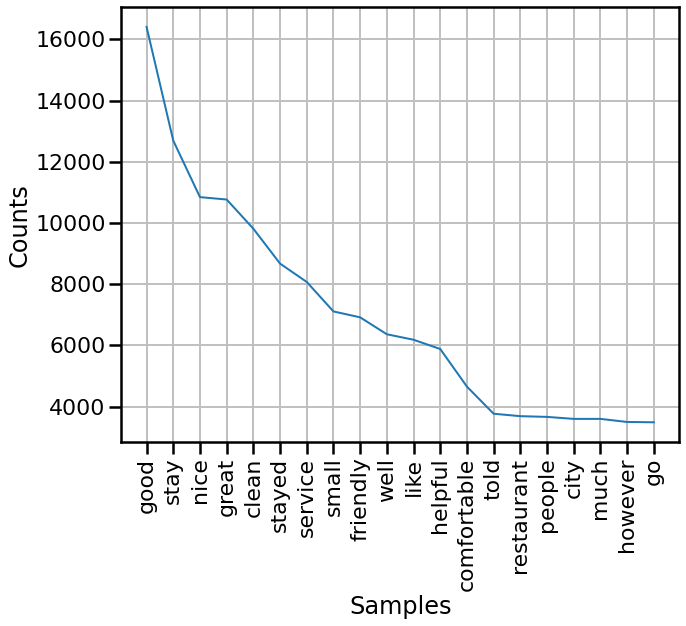

In [ ]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_reviews_no_stop_4).plot(20)
plt.show()

In [ ]:
for word in ['told','restaurant','much','go','people','city']:
    stop_words.append(word)

In [ ]:
flat_list_reviews_no_stop_5 = [word for word in flat_list_reviews_no_stop_4 if word not in stop_words]

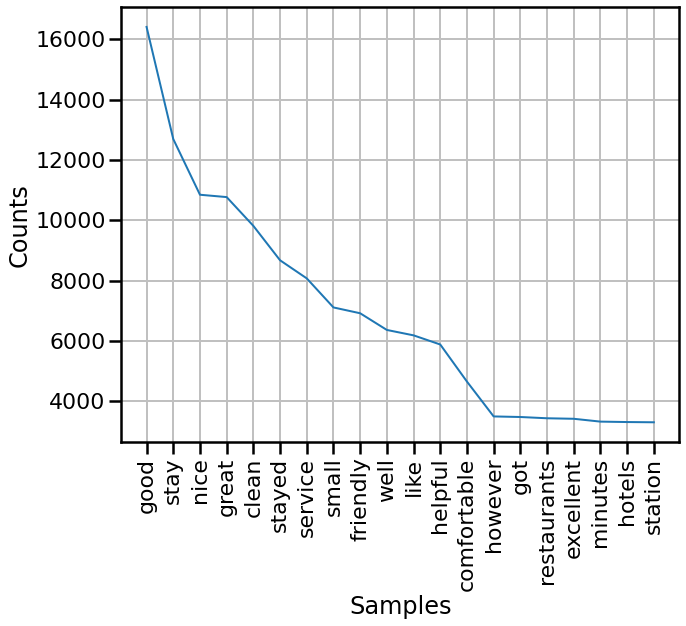

In [ ]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_reviews_no_stop_5).plot(20)
plt.show()

In [ ]:
for word in ['got','restaurants','minutes','hotels','station']:
    stop_words.append(word)

In [ ]:
flat_list_reviews_no_stop_6 = [word for word in flat_list_reviews_no_stop_5 if word not in stop_words]

In [ ]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_reviews_no_stop_6).plot(20)
plt.show()

In [ ]:
for word in ['berlin']:
    stop_words.append(word)

In [ ]:
flat_list_reviews_no_stop_7 = [word for word in flat_list_reviews_no_stop_6 if word not in stop_words]

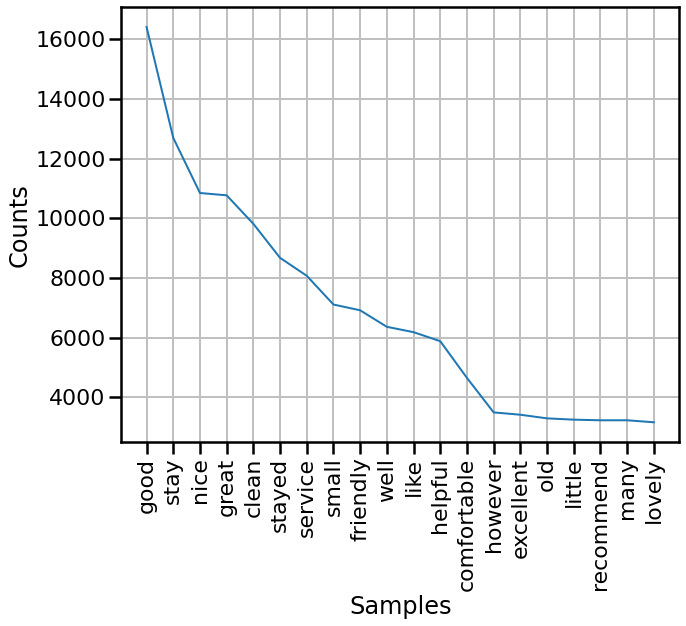

In [ ]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_reviews_no_stop_7).plot(20)
plt.show()

In [ ]:
flat_clean_str = " ".join(flat_list_reviews_no_stop_6)

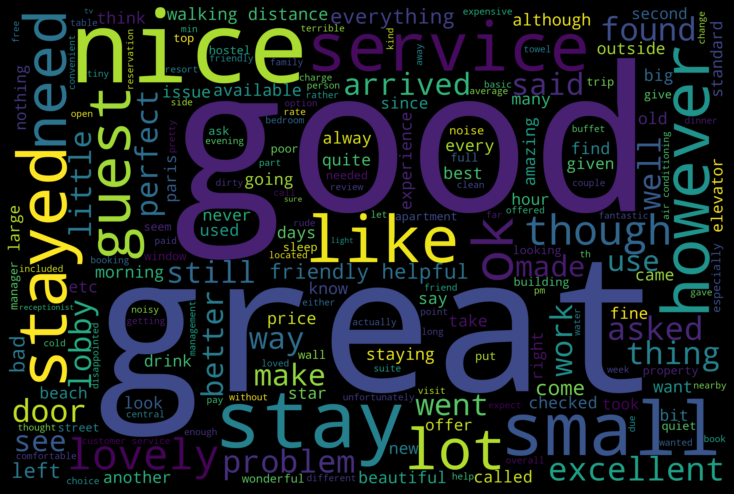

In [ ]:
wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      background_color = 'black',
                      stopwords = stop_words)

wordcloud.generate(flat_clean_str)

plt.figure(figsize = (10,10),
           facecolor = 'k',
           edgecolor = 'k')

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
stemmer = PorterStemmer()
lemmy = WordNetLemmatizer()

In [ ]:
def apply_stem(doc):
    
    doc_split = doc.split(' ')
    stem_doc = ''
    for word in doc_split:
        stem_doc += stemmer.stem(word) + ' '
        
    return stem_doc



def apply_lem(doc):
    
    doc_split = doc.split(' ')
    lem_v_doc = ''
    for word in doc_split:
        lem_v_doc += lemmy.lemmatize(word, pos='v') + ' '
        
    doc_split = lem_v_doc.split(' ')
    lem_doc = ''
    for word in doc_split:
        lem_doc += lemmy.lemmatize(word, pos='a') + ' '
        
    return lem_doc

In [ ]:
nltk.download('wordnet')
df_train['review_stemmed'] = df_train['review'].apply(apply_stem)
df_train['review_lemmed'] = df_train['review'].apply(apply_lem)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
review_index_to_check = 1013
print("ORIGINAL REVIEW:",'\n',df_train['review'].iloc[review_index_to_check],'\n')
print("STEMMED REIVEW:",'\n',df_train['review_stemmed'].iloc[review_index_to_check],'\n')
print("LEMMED REVIEW:",'\n',df_train['review_lemmed'].iloc[review_index_to_check],'\n')

ORIGINAL REVIEW: 
 The location is great. Only some minutes walk to most places in „Mitte“. Also check Point Charlie is close. You have a lot of restaurants and cafes near by. Hotel is nice clean and has big rooms. Also my room was very quite. Only problem was I had no telephone signal at my room. I can defend recommend it 

STEMMED REIVEW: 
 the locat is great. onli some minut walk to most place in „mitte“. also check point charli is close. you have a lot of restaur and cafe near by. hotel is nice clean and ha big rooms. also my room wa veri quite. onli problem wa I had no telephon signal at my room. I can defend recommend it  

LEMMED REVIEW: 
 The location be great. Only some minutes walk to most place in „Mitte“. Also check Point Charlie be close. You have a lot of restaurants and cafes near by. Hotel be nice clean and have big rooms. Also my room be very quite. Only problem be I have no telephone signal at my room. I can defend recommend it   



In [ ]:
df_train.head()

id  ...                                      review_lemmed
0   0  ...  Arrived about 10pm and check in be painless.  ...
1   1  ...  I check in at 4pm even tough room be not ready...
2   2  ...  I choose this hotel, as it be in a good locati...
3   3  ...  Great location, super close to shop & a 10min ...
4   4  ...  I be in the Sir Adam Hotel to visit a friend. ...

[5 rows x 5 columns]

In [ ]:
x_train, y_train = (df_train.drop(columns=['rating']),df_train['rating'])

In [ ]:
print(x_train.shape)
print(y_train.shape)

(35004, 4)
(35004,)


## **TF-IDF Vectorisation for Reviews**

In [ ]:
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

tf_idf_vect = TfidfVectorizer(lowercase=True,
                              tokenizer = tokenizer.tokenize, 
                              stop_words=stop_words, 
                              ngram_range=(1,2),
                              min_df = 0.05)
 
x_lemm_train_tfidf_sparse = tf_idf_vect.fit_transform(df_train['review_lemmed'])


x_lemm_train_text = pd.DataFrame(x_lemm_train_tfidf_sparse.toarray(), 
                                  columns=tf_idf_vect.get_feature_names())


x_lemm_train_text.head()

air  always  another    arrive  ...       way      well  wifi  work
0  0.0     0.0      0.0  0.000000  ...  0.000000  0.175884   0.0   0.0
1  0.0     0.0      0.0  0.000000  ...  0.000000  0.272810   0.0   0.0
2  0.0     0.0      0.0  0.256029  ...  0.000000  0.205623   0.0   0.0
3  0.0     0.0      0.0  0.000000  ...  0.193844  0.000000   0.0   0.0
4  0.0     0.0      0.0  0.000000  ...  0.000000  0.000000   0.0   0.0

[5 rows x 123 columns]

### **Word Processing for the Development Dataset**



In [ ]:
print(df_dev)

        id                                             review  rating
0        0  The hotel position is very good, center of the...       2
1        1  Not a very big room but very comfortable and c...       4
2        2  The hotel is located near Kurfürstendamm in a ...       4
3        3  My booking was for 2 rooms and I have made the...       2
4        4  Excellent hotel, fantastic swimming pool, very...       5
...    ...                                                ...     ...
7494  7494  we stayed here earlier this month with another...       5
7495  7495  We stayed 3 nights at this hotel.   The staff ...       3
7496  7496  Our first night here, a large group of Guests ...       2
7497  7497  Arrived here on Thursday 14th with 5 other peo...       3
7498  7498  I had a wonderful 5 night stay at the Hotel l'...       5

[7499 rows x 3 columns]


In [ ]:
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7499 entries, 0 to 7498
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7499 non-null   int64 
 1   review  7499 non-null   object
 2   rating  7499 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 175.9+ KB


In [ ]:
df_dev.rating.value_counts()

1    1523
2    1507
4    1500
5    1486
3    1483
Name: rating, dtype: int64

In [ ]:
df_train.rating.unique()

array(['4', '2', '3', '1', '5'], dtype=object)

In [ ]:
df_dev.describe()

id       rating
count  7499.000000  7499.000000
mean   3749.000000     2.989199
std    2164.919167     1.416387
min       0.000000     1.000000
25%    1874.500000     2.000000
50%    3749.000000     3.000000
75%    5623.500000     4.000000
max    7498.000000     5.000000

In [ ]:
df_dev.rating.value_counts().plot.pie()

In [ ]:
df_train.rating.value_counts().plot.pie()

In [ ]:
rating = pd.DataFrame(df_dev.groupby('rating').size().sort_values(ascending=False)).reset_index()

In [ ]:
rating.rename(columns={0:'count'},inplace=True)

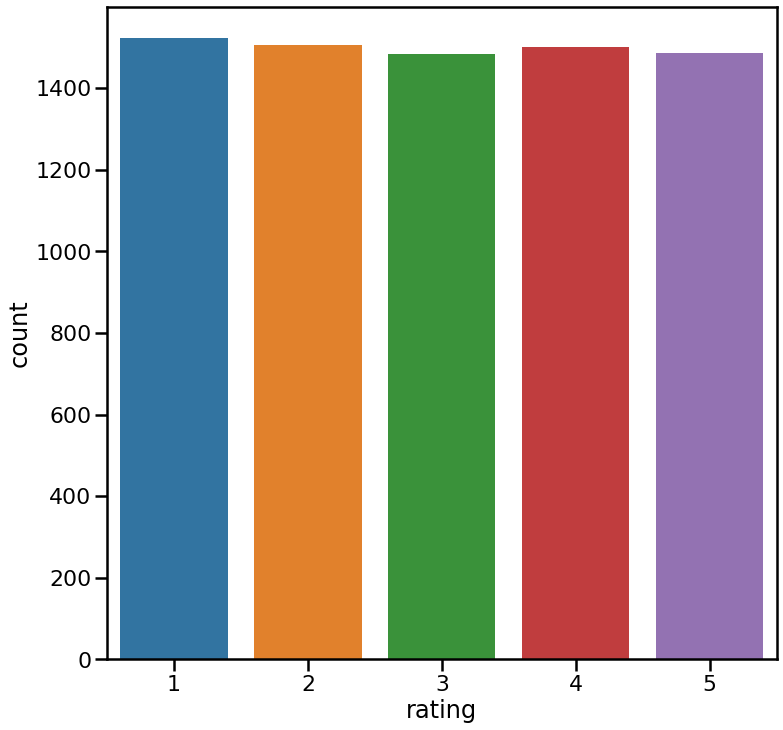

In [ ]:
plt.figure(figsize=(12,12))
sns.barplot(x='rating',y='count',data=rating)
plt.show()

**Removing Unmeaningful Words for Development Dataset - 1st Attempt**

In [ ]:
flat_review = " ".join(df_dev['review'].values)

In [ ]:
flat_list_reviews = []
tokenizer = RegexpTokenizer(r'[a-zA-Z]+') 
tokenized_reviews = tokenizer.tokenize(flat_review)

for review in tokenized_reviews:
    flat_list_reviews.append(review.lower())

In [ ]:
stop_words = stopwords.words("english")

flat_list_reviews_no_stop = [word for word in flat_list_reviews if word not in stop_words]

In [ ]:
plt.figure(figsize=(15,3))
FreqDist(flat_list_reviews_no_stop).plot(40)
plt.show()

In [ ]:
for word in ['hotel','room','staff','rooms','location','would','one','us','night','also','get','really','bed', 'time','day','could','check','bathroom','even','front','place','area','area','walk','desk','floor','back' ]:
    stop_words.append(word)

In [ ]:
flat_list_reviews_no_stop_2 =  [word for word in flat_list_reviews if word not in stop_words]

In [ ]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_reviews_no_stop_2).plot(20)
plt.show()

**Removing Unmeaningful Words from Development Dataset - 2nd Attempt**

In [ ]:
for word in ['two','bar','nights','first','close','reception']:
    stop_words.append(word)

In [ ]:
flat_list_reviews_no_stop_3 = [word for word in flat_list_reviews_no_stop_2 if word not in stop_words]

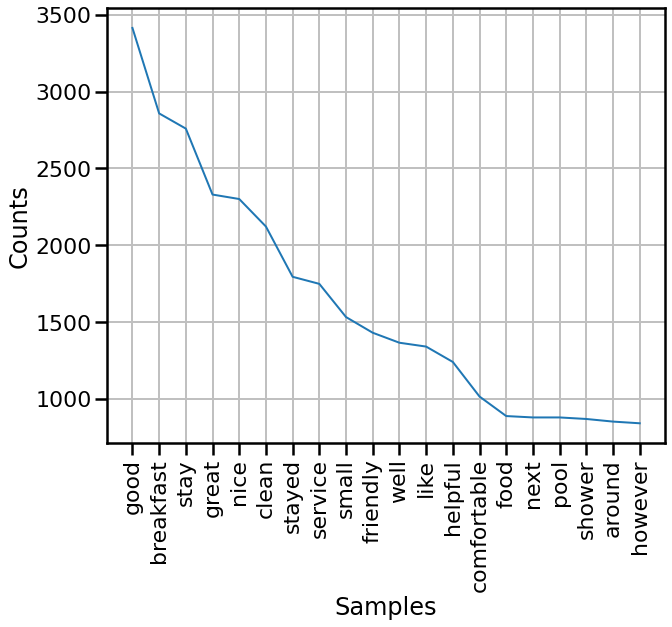

In [ ]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_reviews_no_stop_3).plot(20)
plt.show()

**Removing Unmeaningful Words from Undevelopment Dataset 3rd Attempt**

In [ ]:
for word in ['food','next','pool','shower','around']:
    stop_words.append(word)

In [ ]:
flat_list_reviews_no_stop_4 = [word for word in flat_list_reviews_no_stop_3 if word not in stop_words]

In [ ]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_reviews_no_stop_4).plot(20)
plt.show()

**Removing Unmeaningful Words from Development Data - 4th Attempt**

In [ ]:
for word in ['go','booked','told','much','restaurant']:
    stop_words.append(word)

In [ ]:
flat_list_reviews_no_stop_5 = [word for word in flat_list_reviews_no_stop_4 if word not in stop_words]

In [ ]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_reviews_no_stop_5).plot(20)
plt.show()

**Removing Unmeaningful Words from Development Data - 5th Attempt**

In [ ]:
for word in ['got','view','people','city']:
    stop_words.append(word)

In [ ]:
flat_list_reviews_no_stop_6 = [word for word in flat_list_reviews_no_stop_5 if word not in stop_words]

In [ ]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_reviews_no_stop_6).plot(20)
plt.show()

**Removing Unmeaningful Words from Development Data - 6th Attempt**

In [ ]:
for word in ['quite','door','restaurants','asked','berlin','hotels']:
    stop_words.append(word)

In [ ]:
flat_list_reviews_no_stop_7 = [word for word in flat_list_reviews_no_stop_6 if word not in stop_words]

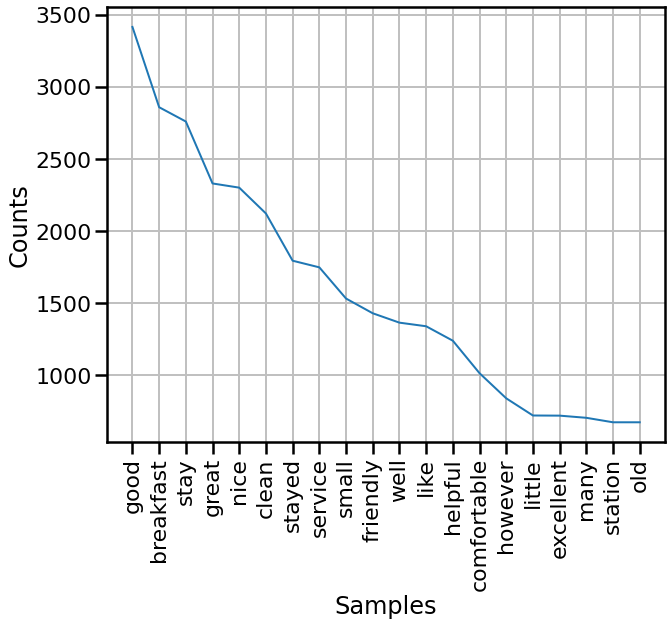

In [ ]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_reviews_no_stop_7).plot(20)
plt.show()

Word Cloud for Reviews - Development Dataset

In [ ]:
flat_clean_str = " ".join(flat_list_reviews_no_stop_6)

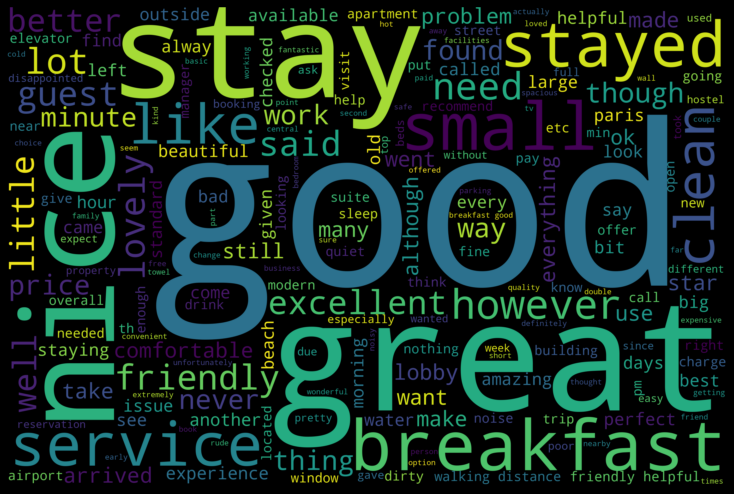

In [ ]:
wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      background_color = 'black',
                      stopwords = stop_words)

wordcloud.generate(flat_clean_str)

plt.figure(figsize = (10,10),
           facecolor = 'k',
           edgecolor = 'k')

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Stemming and Lemming**

Stemmation had broken down some words into words that don't exist, whereas lemmitisation had simplified adjectives and verbs to their root form. I chose to continue with the lemmitised version of the texts for further processing.

In [ ]:
df_dev['review_stemmed'] = df_dev['review'].apply(apply_stem)
df_dev['review_lemmed'] = df_dev['review'].apply(apply_lem)

In [ ]:
review_index_to_check = 1013
print("ORIGINAL REVIEW:",'\n',df_dev['review'].iloc[review_index_to_check],'\n')
print("STEMMED REIVEW:",'\n',df_dev['review_stemmed'].iloc[review_index_to_check],'\n')
print("LEMMED REVIEW:",'\n',df_dev['review_lemmed'].iloc[review_index_to_check],'\n')

ORIGINAL REVIEW: 
 Sensation Authentic Gracia has quite good location. It is not located directly at some important and famous touristic sites, but still not far . It is very handy that it is located berween two metro stations Joanic (L4, yellow line) and of course La Sagrada station  (L2- purple and L2 Blue). It has big enough space , it is comfortably equiped with furniture and home appliances. We were accomodated at the 4th floor, they have a nice balcony and on the top of the building there is also some sun beds for relax. The neighbourhood is very nice , Gracia is very nice area , residential and safe. We came late in the evening , the people from Sensation explained how to enter the building , very convenient.  They could do something more about updating furniture. It is not old, just too basic. The reception is in another building ,some 50-60 meters away. There are many food places in the area and two supermarkets nearby which worked until late at night. Nice place though is Sen

In [ ]:
df_dev.head()

id  ...                                      review_lemmed
0   0  ...  The hotel position be very good, center of the...
1   1  ...  Not a very big room but very comfortable and c...
2   2  ...  The hotel be locate near Kurfürstendamm in a q...
3   3  ...  My book be for 2 room and I have make the book...
4   4  ...  Excellent hotel, fantastic swim pool, very war...

[5 rows x 5 columns]

Prior to vectorising the development dataset, I assigned x and y for the validation.



In [ ]:
x_val, y_val = (df_dev.drop(columns=['rating']),df_dev['rating'])

In [ ]:
print(x_val.shape)
print(y_val.shape)

(7499, 4)
(7499,)


**F-IDF Vectorisation for Reviews**

In [ ]:
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

tf_idf_vect = TfidfVectorizer(lowercase=True,
                              tokenizer = tokenizer.tokenize, 
                              stop_words=stop_words, 
                              ngram_range=(1,2),
                              min_df = 0.05)
 
x_lemm_val_tfidf_sparse = tf_idf_vect.fit_transform(x_val['review_lemmed'])

x_lemm_val_text = pd.DataFrame(x_lemm_val_tfidf_sparse.toarray(), 
                                  columns=tf_idf_vect.get_feature_names())

x_lemm_val_text.head()

air  although   another  arrive       ask  ...  want  water  way  well  work
0  0.000000       0.0  0.000000     0.0  0.000000  ...   0.0    0.0  0.0   0.0   0.0
1  0.000000       0.0  0.000000     0.0  0.000000  ...   0.0    0.0  0.0   0.0   0.0
2  0.320829       0.0  0.000000     0.0  0.000000  ...   0.0    0.0  0.0   0.0   0.0
3  0.000000       0.0  0.213872     0.0  0.356708  ...   0.0    0.0  0.0   0.0   0.0
4  0.000000       0.0  0.000000     0.0  0.000000  ...   0.0    0.0  0.0   0.0   0.0

[5 rows x 118 columns]

In [ ]:
print(x_lemm_val_text.shape)
print(y_val.shape)

(7499, 118)
(7499,)


**Word Processing for the Test Dataset**



In [ ]:
print(df_test)

        id                                             review
0        0  Not at all what expected.   Our mountain view ...
1        1  Good location as we needed to head to Reims th...
2        3  Me and my son just returned from Broadmoor Mia...
3        4  The place was filthy and full of stoned backpa...
4        6  The hotel itself is really nice and modern whi...
...    ...                                                ...
6495  7494  The building is a superb one, pretty nice gard...
6496  7496  I stayed here as part of a 3 day family trip t...
6497  7497  We stayed in this hotel for 2 nights (couple +...
6498  7498  I have previously felt that the Intercontinent...
6499  7499  We booked this hotel on Expedia because of its...

[6500 rows x 2 columns]


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6500 non-null   int64 
 1   review  6500 non-null   object
dtypes: int64(1), object(1)
memory usage: 101.7+ KB


Checking Frequency of Words and Phrases in Review 

Using the FreqDist function in the ntlk library I plotted a graph with the most frequent words and phrases in both columns. Stopwords were removed to capture the more meaningful words.

I flattened the review summary:


In [ ]:
flat_review = " ".join(df_test['review'].values)

In [ ]:
flat_list_review = []
tokenizer = RegexpTokenizer(r'[a-zA-Z]+') 
tokenized_reviews = tokenizer.tokenize(flat_review)

for review in tokenized_reviews:
    flat_list_review.append(review.lower())

In [ ]:
stop_words = stopwords.words("english")

flat_list_review_no_stop = [word for word in flat_list_review if word not in stop_words]

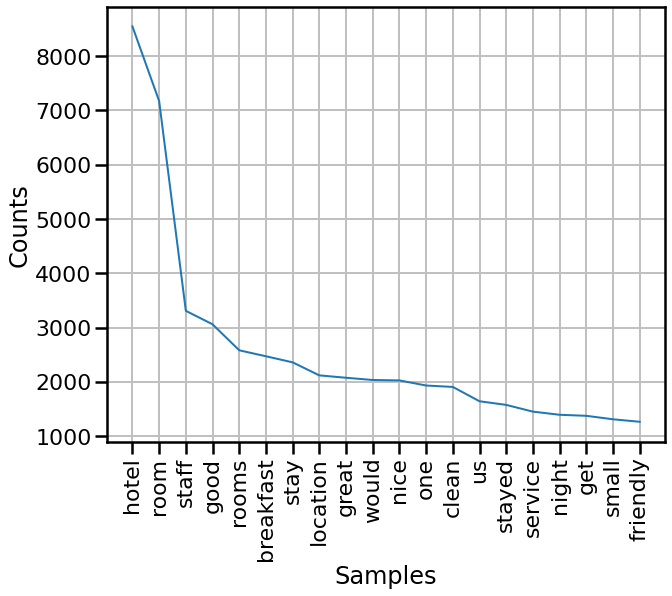

In [ ]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
FreqDist(flat_list_review_no_stop).plot(20)
plt.show()

**Removing Unmeaningful Words from test dataset - 1st Attempt**

In [ ]:
for word in ['hotel','room','staff','rooms','breakfast','would','one','us', 'night','get']:
    stop_words.append(word)

In [ ]:
flat_list_review_no_stop_2 =  [word for word in flat_list_review_no_stop if word not in stop_words]

In [ ]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_review_no_stop_2).plot(20)
plt.show()

**Removing Unmeaningful Words from Test dataset - 2nd Attempt**

In [ ]:
Removing Unmeaningful Words from Test dataset - 1st Attempt

In [ ]:
for word in ['also','really','bed','time','day','check','could']:
    stop_words.append(word)

In [ ]:
flat_list_review_no_stop_3 =  [word for word in flat_list_review_no_stop_2 if word not in stop_words]

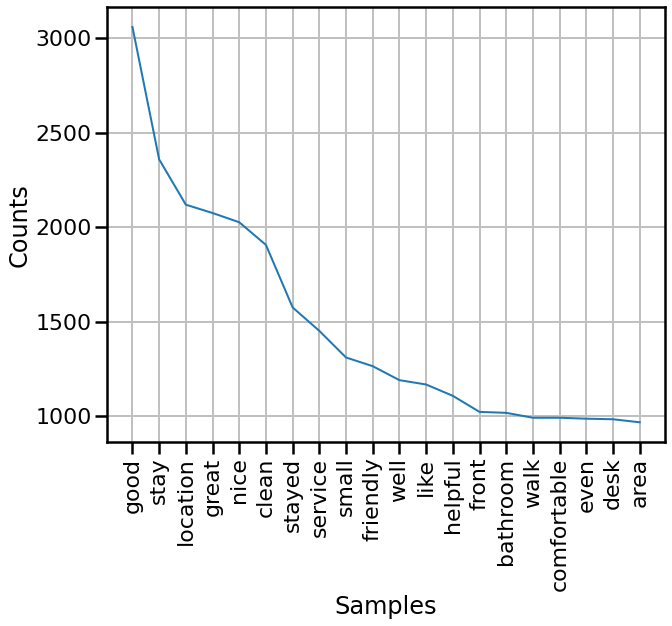

In [ ]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_review_no_stop_3).plot(20)
plt.show()

**Removing Unmeaningful Words from Test dataset - 3nd Attempt**

In [ ]:
for word in ['front','bathroom','walk','even','desk','area']:
    stop_words.append(word)

In [ ]:
flat_list_reviews_no_stop_4 = [word for word in flat_list_reviews_no_stop_3 if word not in stop_words]

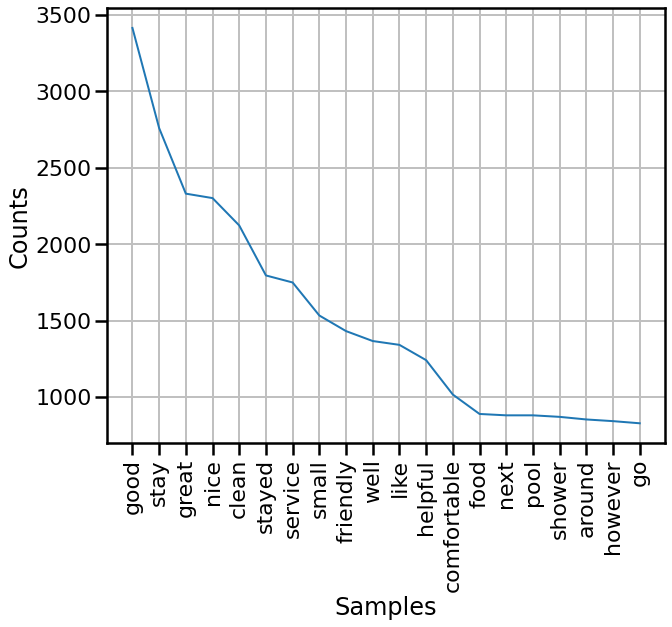

In [ ]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_reviews_no_stop_4).plot(20)
plt.show()

**Removing Unmeaningful Words from Test dataset - 4th Attempt**

In [ ]:
for word in ['food','next','pool','shower','around','go']:
    stop_words.append(word)

In [ ]:
flat_list_reviews_no_stop_5 = [word for word in flat_list_reviews_no_stop_4 if word not in stop_words]

In [ ]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_reviews_no_stop_5).plot(20)
plt.show()

**Removing Unmeaningful Words from Test dataset - 5th Attempt**

In [ ]:
for word in ['booked','restaurant','got','view','people','city']:
    stop_words.append(word)

In [ ]:
flat_list_reviews_no_stop_6 = [word for word in flat_list_reviews_no_stop_5 if word not in stop_words]

In [ ]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_reviews_no_stop_6).plot(20)
plt.show()

**Removing Unmeaningful Words from Test dataset - 6th Attempt**

In [ ]:
for word in ['quite','many','door','restaurants']:
    stop_words.append(word)

In [ ]:
flat_list_reviews_no_stop_7 = [word for word in flat_list_reviews_no_stop_6 if word not in stop_words]

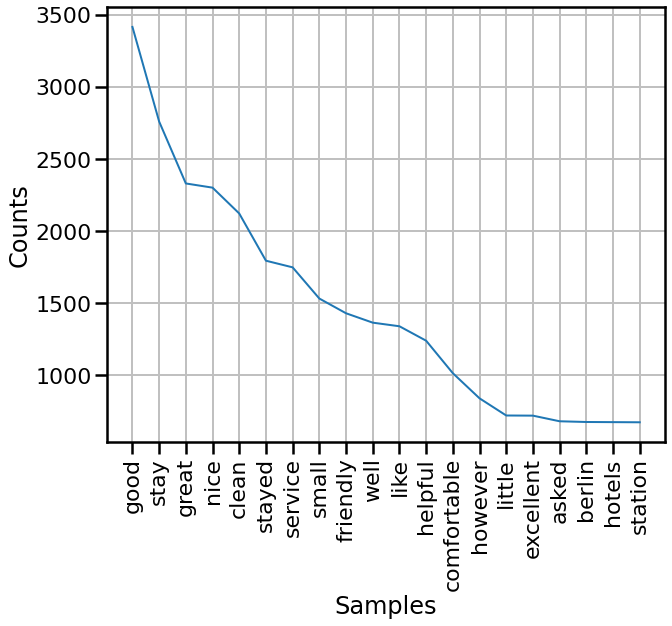

In [ ]:
plt.figure(figsize=(10,8))
FreqDist(flat_list_reviews_no_stop_7).plot(20)
plt.show()

Word Cloud for Reviews - Test Dataset

In [ ]:
Test_flat_clean_str = " ".join(flat_list_reviews_no_stop_7)

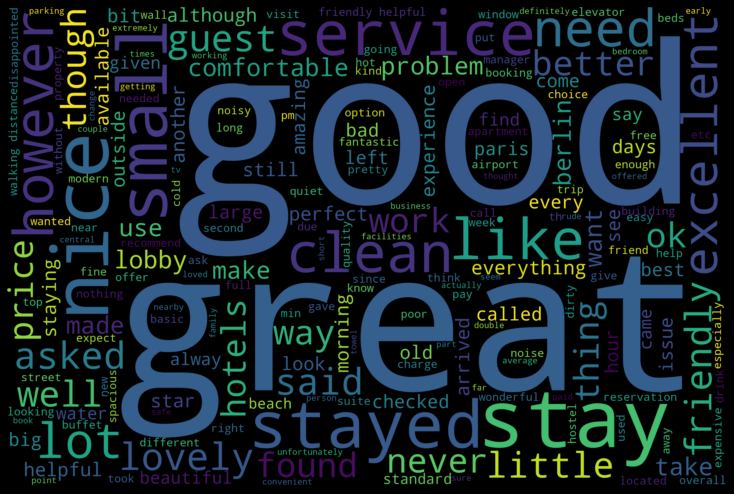

In [ ]:
wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      background_color = 'black',
                      stopwords = stop_words)

wordcloud.generate(Test_flat_clean_str)

plt.figure(figsize = (10,10),
           facecolor = 'k',
           edgecolor = 'k')

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Stemming and Lemming

To narrow down the feature words I applied stemmation and lemmitisation to both the reviews

In [ ]:
df_test['review_stemmed'] = df_test['review'].apply(apply_stem)
df_test['review_lemmed'] = df_test['review'].apply(apply_lem)

In [ ]:
review_index_to_check = 1013
print("ORIGINAL REVIEW:",'\n',df_test['review'].iloc[review_index_to_check],'\n')
print("STEMMED REIVEW:",'\n',df_test['review_stemmed'].iloc[review_index_to_check],'\n')
print("LEMMED REVIEW:",'\n',df_test['review_lemmed'].iloc[review_index_to_check],'\n')

ORIGINAL REVIEW: 
  all where better then expected, and Berlin is typically better than average, room - perfect, breakfast , perfect+, stuff, gym, atmosphere  all where the best. even the location that seems a bit out of center is just in front of both Sbhan and  M5/6 tram  

STEMMED REIVEW: 
  all where better then expected, and berlin is typic better than average, room - perfect, breakfast , perfect+, stuff, gym, atmospher  all where the best. even the locat that seem a bit out of center is just in front of both sbhan and  m5/6 tram   

LEMMED REVIEW: 
  all where good then expected, and Berlin be typically good than average, room - perfect, breakfast , perfect+, stuff, gym, atmosphere  all where the best. even the location that seem a bite out of center be just in front of both Sbhan and  M5/6 tram    



In [ ]:
df_test.head()

id  ...                                      review_lemmed
0   0  ...  Not at all what expected.   Our mountain view ...
1   1  ...  Good location as we need to head to Reims the ...
2   3  ...  Me and my son just return from Broadmoor Miami...
3   4  ...  The place be filthy and full of stone backpack...
4   6  ...  The hotel itself be really nice and modern whi...

[5 rows x 4 columns]

In [ ]:
x_test = df_test 
print(x_test.shape)

(6500, 4)


TF-IDF Vectorisation for Reviews - Test Dataset

In [ ]:
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

tf_idf_vect = TfidfVectorizer(lowercase=True,
                              tokenizer = tokenizer.tokenize, 
                              stop_words=stop_words, 
                              ngram_range=(1,2),
                              min_df = 0.05)
 
x_lemm_test_tfidf_sparse = tf_idf_vect.fit_transform(x_test['review_lemmed'])

x_lemm_test_text = pd.DataFrame(x_lemm_test_tfidf_sparse.toarray(), 
                                  columns=tf_idf_vect.get_feature_names())

x_lemm_test_text.head()

air  although    always  another  ...     water       way  well      work
0  0.0       0.0  0.000000      0.0  ...  0.000000  0.000000   0.0  0.000000
1  0.0       0.0  0.000000      0.0  ...  0.000000  0.000000   0.0  0.000000
2  0.0       0.0  0.502744      0.0  ...  0.000000  0.000000   0.0  0.425235
3  0.0       0.0  0.000000      0.0  ...  0.000000  0.000000   0.0  0.000000
4  0.0       0.0  0.000000      0.0  ...  0.344009  0.177792   0.0  0.000000

[5 rows x 122 columns]

In [ ]:
print(x_lemm_test_text.shape)

(6500, 122)


Saving Preprocessed Dataset as CSVs

Using the lemmed texts for review, I used TF-IDF vectorisation with an ngram range of 2, leaving me with a vectorised dataset with 138 words and phrases (112 from reviews and 26 from review summaries). I then saved the x and y data in separate csv files for modelling.

In [ ]:
mkdir -p /root/.dataset/

In [ ]:
open('/C:/Users/DC/Desktop/Assignment/data/x_train_data.csv', 'w')

FileNotFoundError: ignored

In [ ]:
x_lemm_train_text.to_csv('x_train_data.csv',index=False)

In [ ]:
from google.colab import files

open('x_train_data.cvs', 'w')
x_lemm_train_text.to_csv('/content/x_train_data.csv',index=False)

files.download('x_train_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
x_lemm_val_text.to_csv('/content/x_val_data.csv',index=False)
files.download('x_val_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
x_lemm_test_text.to_csv('/content/x_test_data.csv',index=False)
files.download('x_test_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y_train.to_csv('/content/y_train_data.csv',index=False)
files.download('y_train_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y_val.to_csv('/content/y_val_data.csv',index=False)
files.download('y_val_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>